# **Import all the required packages**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline
from sklearn.datasets import make_blobs

# **Helper Functions**

In [3]:
def plot_kmeans(xy, c12):
    plt.scatter(xy[:,0], xy[:,1])
    plt.scatter(c12[:,0], c12[:,1], marker="x", color='r')
    plt.show()

def find_distance(xy,c12):
    dist0 = np.linalg.norm(xy-c12[0],axis=1,ord=2)
    dist1 = np.linalg.norm(xy-c12[1],axis=1,ord=2)
    return (dist0, dist1)

def find_groups(D):
    S = D[0]<=D[1]
    return S.astype('float')

def update_centroids(xy, S):
    S0 = np.where(S==0)
    S1 = np.where(S==1)
    c12[0] = (np.sum(xy[S0],axis=0))/len(S0[0]+1e-6) # cluster1 mean
    c12[1] = (np.sum(xy[S1],axis=0))/len(S1[0]+1e-6) #cluster2 mean 
    return c12

In [4]:
plt.figure(figsize=(80, 80))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

<Figure size 5760x5760 with 0 Axes>

# **Data Set Creation for clustering**

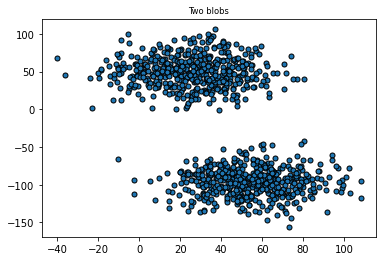

In [5]:
plt.subplot(111)
plt.title("Two blobs", fontsize='small')
X1, _ = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=20.2, center_box=(-100.0, 100.0), shuffle=True, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',
            s=25, edgecolor='k')

In [6]:
xy = X1

# **Data (2-dimentional)**

In [7]:
xy

array([[  61.89474099,  -63.23856905],
       [  46.74133059, -115.38959714],
       [  47.73546376,  -82.43386887],
       ...,
       [  60.18153129, -105.35991661],
       [  13.56246673,   49.17049128],
       [  77.06558875, -109.94537274]])

# **centroids initialization**

In [8]:
c12 = np.random.randn(2,2)
c12

array([[-0.50309024,  0.77126606],
       [-0.60661216,  1.1529478 ]])

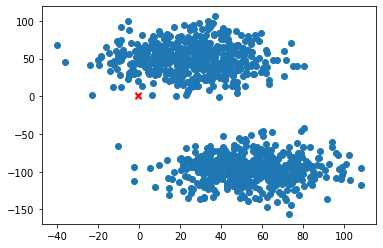

In [9]:
plot_kmeans(xy, c12)

In [10]:
min_x, max_x = min(xy.T[1]) ,max(xy.T[0]) 
print(min_x, max_x)

-156.03746490355462 108.39831687453136


In [11]:
min_v = min(min(xy[0]), min(xy[1]))
max_v = max(max(xy[0]), max(xy[1]))
print(min_v, max_v)

-115.38959713827404 61.8947409898491


# **K-means algorithm in action**

[[ 25.78440499  50.97814095]
 [ 53.84193702 -94.26533599]]


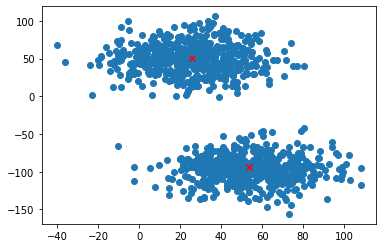

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


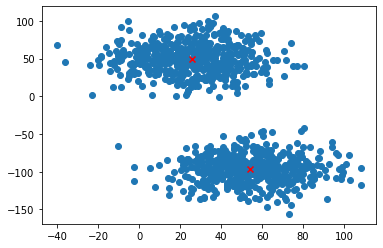

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


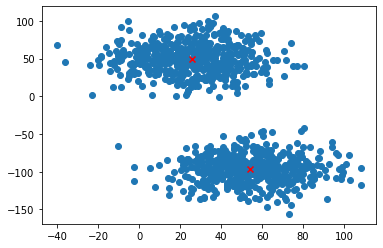

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


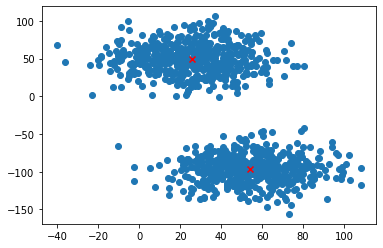

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


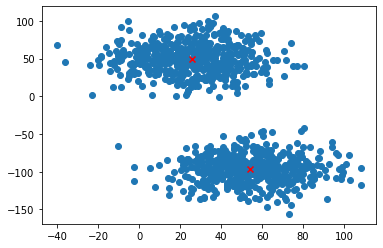

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


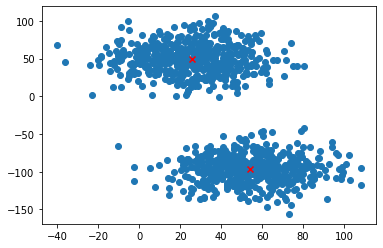

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


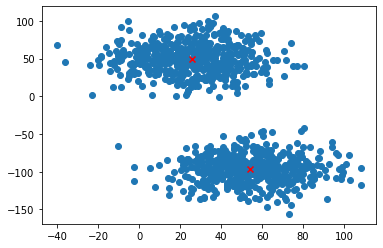

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


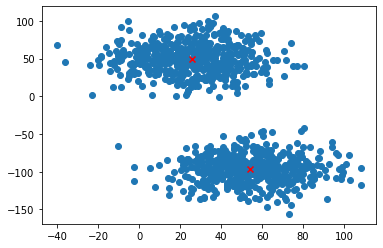

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


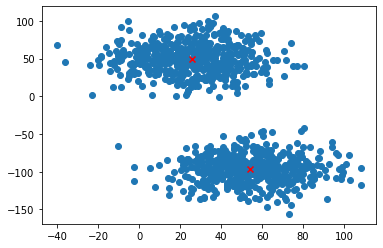

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


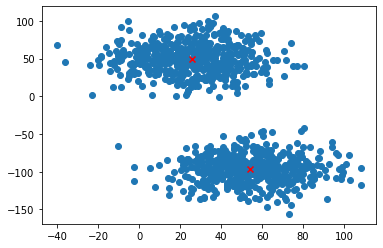

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


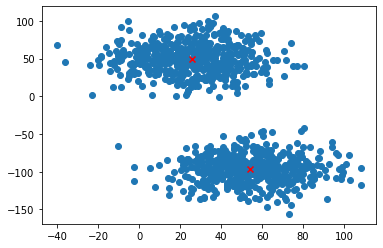

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


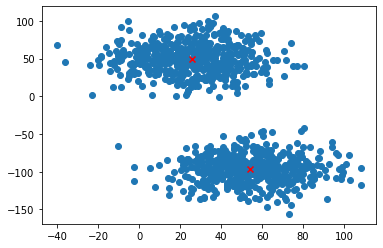

12


In [12]:
count = 0
C = defaultdict(list)
for i in range(20):
    D = find_distance(xy,c12)
    G = find_groups(D)
    c12 = update_centroids(xy, G)
    while i<10 and np.isnan(c12).any()==True:
        c12 = np.random.randn(2,2)
    print(c12)
    
    plot_kmeans(xy, c12)
    count+=1
    C[i] = c12
    if i>10 and C[i-1].sum() == C[i].sum():
        print(count)
        break

# **Visualizing the clusters**

In [13]:
def find_slope(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    m = (y2-y1)/(x2-x1)
    return m
def perpendicular_slope(m1):
    return -(1/m1)

def get_c(slope, point):
    c = point[1] - slope*point[0]
    return c
    
def line_passing_through(point, slope):
    return get_c(slope, point)

In [14]:
p1, p2 = c12[1]
print(p1)
print(p2)

25.973174357028004
49.988759621486885


In [15]:
G.astype('int')

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

# **Visualize using matplotlib**

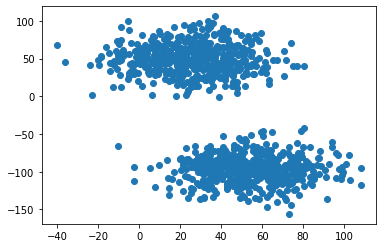

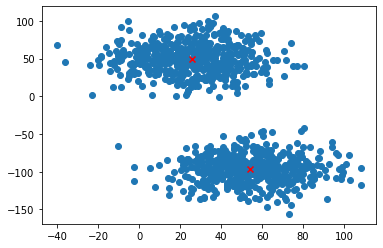

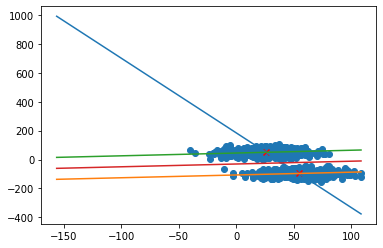

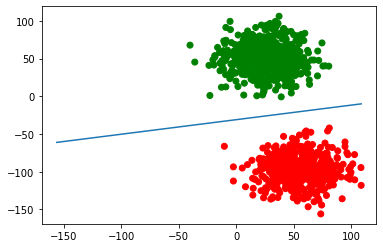

In [16]:
plt.gcf().clear()
plt.scatter(xy[:,0], xy[:,1])
plt.show()
plot_kmeans(xy, c12)
m = find_slope(c12[0], c12[1])

c = line_passing_through(c12[0], m)
c = line_passing_through(c12[1], m)

x = np.linspace(min_x, max_x, 10, dtype='float')
y = m*x+c
plt.plot(x,y)




m1 = m
m2 = perpendicular_slope(m1)
c1 = get_c(m2, c12[0])
y = m2*x+c1
plt.plot(x,y)


c2 = get_c(m2, c12[1])
y = m2*x+c2
plt.plot(x,y)


cm = get_c(m2, np.mean(c12, axis=0))
y = m2*x+cm
plt.plot(x,y)

categories = np.array(G.astype('int'))

colormap = np.array(['r', 'g'])
plot_kmeans(xy, c12)
plt.scatter(xy[:,0], xy[:,1], c=colormap[categories])
plt.plot(x,y)
plt.show()